<a href="https://colab.research.google.com/github/avijit7074/ipl_new_dashboard/blob/master/Ipl_win_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv('/content/IPL_ball_by_ball_updated.csv.zip')

In [ ]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243810,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243811,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243812,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matches=pd.read_csv('/content/match_info_data.csv')

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin


In [ ]:
df.shape

(243815, 22)

In [ ]:
matches.shape

(1024, 18)

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.replace({'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
            'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
            'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy, Navi Mumbai',
            'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
            'Eden Gardens': 'Eden Gardens, Kolkata',
            'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
            'M Chinnaswamy Stadium': 'M.Chinnaswamy Stadium, Bengaluru',
            'M Chinnaswamy Stadium, Bengaluru': 'M.Chinnaswamy Stadium, Bengaluru',
            'M.Chinnaswamy Stadium': 'M.Chinnaswamy Stadium, Bengaluru',
            'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk, Chennai',
            'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chepauk, Chennai',
            'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
            'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium, Motera, Ahmedabad',
            'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Motera, Ahmedabad',
            'OUTsurance Oval': 'Mangaung Oval, Bloemfontein',
            'New Wanderers Stadium': 'The Wanderers Stadium, Johannesburg',
            'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali, '
                                                            'Chandigarh',
            'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, '
                                                                    'Mohali, Chandigarh',
            'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium,'
                                                          ' Mohali, Chandigarh',
            'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
            'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
            'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
            'Wankhede Stadium': 'Wankhede Stadium, Mumbai',
            'Subrata Roy Sahara Stadium': 'Maharashtra Cricket Association Stadium, Pune',
            'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi'}, inplace=True)

In [ ]:
df['total_runs']=df['runs_off_bat']+df['extras']

In [ ]:
total_score_df=df.groupby(['match_id', 'innings']).sum()['total_runs'].reset_index()

<ipython-input-19-7e3eecd2d15c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=df.groupby(['match_id', 'innings']).sum()['total_runs'].reset_index()


In [ ]:
total_score_df=total_score_df[total_score_df.innings==1]

In [ ]:
matches_df=matches.merge(total_score_df, left_on='id', right_on='match_id')

Total 21 matches decided by 'DLS'

In [ ]:
matches[matches.result=='D/L'].shape

(21, 18)

In [ ]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,innings,total_runs
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,1370353,1,214
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,1370352,1,233
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,1370351,1,182
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford,1370350,1,172
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit,1359543,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf,335986,1,110
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash,335985,1,165
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell,335984,1,129
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin,335983,1,240


In [ ]:
matches_df.team1.unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
matches_df['team1'].replace({'Delhi Daredevils':'Delhi Capitals',
                             'Kings XI Punjab':'Punjab Kings',
                             'Deccan Chargers':'Sunrisers Hyderabad'}, inplace=True)

'Kings XI Punjab'-> 'Punjab Kings', 'Deccan Chargers'-> 'Sunrisers Hyderabad', 'Delhi Daredevils'->'Delhi Capitals'

In [ ]:
matches_df['team2'].replace({'Delhi Daredevils':'Delhi Capitals',
                             'Kings XI Punjab':'Punjab Kings',
                             'Deccan Chargers':'Sunrisers Hyderabad'}, inplace=True)

In [ ]:
matches_df.team1.unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [ ]:
teams = ['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals']

In [ ]:
matches_df=matches_df[matches_df['team1'].isin(teams)]
matches_df=matches_df[matches_df['team2'].isin(teams)]

In [ ]:
matches_df.team1.unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals'], dtype=object)

In [ ]:
matches_df.team1.unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals'], dtype=object)

In [ ]:
matches_df.shape

(909, 21)

I need all the normal matches(Not applied Duckworth-Lewis)

In [ ]:
matches_df=matches_df[matches_df.result != 'D/L']

In [ ]:
matches_df.shape

(892, 21)

In [ ]:
matches_df = matches_df[['id', 'city', 'winner', 'total_runs']]

In [ ]:
matches_df.rename(columns={'id':'match_id'}, inplace=True)

In [ ]:
matches_df

,match_id,city,winner,total_runs
1,1370352,Ahmedabad,Gujarat Titans,233
2,1370351,Chennai,Mumbai Indians,182
3,1370350,Chennai,Chennai Super Kings,172
4,1359543,Mumbai,Mumbai Indians,200
5,1359544,Bengaluru,Gujarat Titans,197
...,...,...,...,...
1019,335986,Kolkata,Kolkata Knight Riders,110
1020,335985,Mumbai,Royal Challengers Bangalore,165
1021,335984,Delhi,Delhi Daredevils,129
1022,335983,Chandigarh,Chennai Super Kings,240


In [ ]:
df=matches_df.merge(df, on='match_id')

In [ ]:
df=df[df.innings==2]

In [ ]:
df.shape

(103511, 26)

In [ ]:
df.sample(5)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y
27932,1304077,Mumbai,Royal Challengers Bangalore,181,2022,2022-04-19,"Dr DY Patil Sports Academy, Navi Mumbai",2,7.7,Lucknow Super Giants,Royal Challengers Bangalore,KL Rahul,KH Pandya,HV Patel,0,0,NaN,NaN,NaN,NaN,NaN,caught,KL Rahul,NaN,NaN,0
2863,1359536,Ahmedabad,Gujarat Titans,188,2023,2023-05-15,"Narendra Modi Stadium, Motera, Ahmedabad",2,2.4,Sunrisers Hyderabad,Gujarat Titans,AK Markram,H Klaasen,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83400,1136601,Kolkata,Mumbai Indians,210,2018,2018-05-09,"Eden Gardens, Kolkata",2,16.6,Kolkata Knight Riders,Mumbai Indians,Kuldeep Yadav,M Prasidh Krishna,KH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
115678,829745,Bangalore,Chennai Super Kings,181,2015,2015-04-22,"M.Chinnaswamy Stadium, Bengaluru",2,4.1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,KD Karthik,MM Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
167560,501237,Mumbai,Mumbai Indians,159,2011,2011-05-02,"Wankhede Stadium, Mumbai",2,16.5,Kings XI Punjab,Mumbai Indians,PP Chawla,SE Marsh,SL Malinga,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df=df[df['batting_team'].isin(teams)]
df=df[df['bowling_team'].isin(teams)]

In [ ]:
print(df.batting_team.unique())
print(df.bowling_team.unique())

['Mumbai Indians' 'Lucknow Super Giants' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Punjab Kings' 'Sunrisers Hyderabad'
 'Chennai Super Kings']
['Gujarat Titans' 'Mumbai Indians' 'Chennai Super Kings'
 'Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Lucknow Super Giants' 'Punjab Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Rajasthan Royals']


In [ ]:
df['current_score']=df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-44-75874749056c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['current_score']=df.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
df['target']=df['total_runs_x']+1

In [ ]:
df.head()

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,234
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,234
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,234
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,234
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,N Wadhera,NaN,NaN,0,5,234


In [ ]:
df['runs_left']=df['target']-df['current_score']

In [ ]:
df

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,234,234
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,234,233
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,234,233
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,234,229
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,N Wadhera,NaN,NaN,0,5,234,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213872,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,80,223,143
213873,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,81,223,142
213874,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,81,223,142
213875,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,LR Shukla,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82,223,141


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64345 entries, 127 to 213876
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                64345 non-null  int64  
 1   city                    60326 non-null  object 
 2   winner                  63325 non-null  object 
 3   total_runs_x            64345 non-null  int64  
 4   season                  64345 non-null  int64  
 5   start_date              64345 non-null  object 
 6   venue                   64345 non-null  object 
 7   innings                 64345 non-null  int64  
 8   ball                    64345 non-null  float64
 9   batting_team            64345 non-null  object 
 10  bowling_team            64345 non-null  object 
 11  striker                 64345 non-null  object 
 12  non_striker             64345 non-null  object 
 13  bowler                  64345 non-null  object 
 14  runs_off_bat            64345 non-n

In [ ]:
df['overs']=df['ball'].astype(str).str.split(".").apply(lambda x: x[0])
df['balls']=df['ball'].astype(str).str.split(".").apply(lambda x: x[1])

In [ ]:
df['overs']=df['overs'].astype(int)
df['balls']=df['balls'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64345 entries, 127 to 213876
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                64345 non-null  int64  
 1   city                    60326 non-null  object 
 2   winner                  63325 non-null  object 
 3   total_runs_x            64345 non-null  int64  
 4   season                  64345 non-null  int64  
 5   start_date              64345 non-null  object 
 6   venue                   64345 non-null  object 
 7   innings                 64345 non-null  int64  
 8   ball                    64345 non-null  float64
 9   batting_team            64345 non-null  object 
 10  bowling_team            64345 non-null  object 
 11  striker                 64345 non-null  object 
 12  non_striker             64345 non-null  object 
 13  bowler                  64345 non-null  object 
 14  runs_off_bat            64345 non-n

In [ ]:

#df.['balls_left']=120-(df['overs']*6)-df['balls']
df

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,234,234,0,1
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,234,233,0,2
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,234,233,0,3
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,234,229,0,4
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,N Wadhera,NaN,NaN,0,5,234,229,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213872,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,80,223,143,14,5
213873,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,81,223,142,14,6
213874,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,81,223,142,14,7
213875,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,LR Shukla,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82,223,141,15,1


In [ ]:
df.head()

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,234,234,0,1
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,234,233,0,2
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,234,233,0,3
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,234,229,0,4
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,N Wadhera,NaN,NaN,0,5,234,229,0,5


In [ ]:
grouped = df.groupby('match_id')
# Iterate through each group and apply a for loop
for match_id, match_group in grouped:
    i=0
    for index, row in match_group.iterrows():
        i+=1
        if (row['wides'] >= 1) or (row['noballs'] >= 1):
            df.loc[index, 'balls_left'] = (120 - i+1)
            i=i-1
        else:
            df.loc[index, 'balls_left'] = 120 - i

In [ ]:
df.tail(50)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left
213827,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,7.6,Royal Challengers Bangalore,Kolkata Knight Riders,CL White,B Akhil,SC Ganguly,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38,223,185,7,6,72.0
213828,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.1,Royal Challengers Bangalore,Kolkata Knight Riders,B Akhil,CL White,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38,223,185,8,1,71.0
213829,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.2,Royal Challengers Bangalore,Kolkata Knight Riders,B Akhil,CL White,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,caught,B Akhil,NaN,NaN,0,38,223,185,8,2,70.0
213830,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.3,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,CL White,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38,223,185,8,3,69.0
213831,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.4,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,CL White,AB Agarkar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,39,223,184,8,4,69.0
213832,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.5,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,CL White,AB Agarkar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,40,223,183,8,5,69.0
213833,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.6,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,CL White,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,41,223,182,8,6,68.0
213834,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.7,Royal Challengers Bangalore,Kolkata Knight Riders,CL White,AA Noffke,AB Agarkar,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,43,223,180,8,7,67.0
213835,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,8.8,Royal Challengers Bangalore,Kolkata Knight Riders,CL White,AA Noffke,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,caught,CL White,NaN,NaN,0,43,223,180,8,8,66.0
213836,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,9.1,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,P Kumar,SC Ganguly,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,44,223,179,9,1,65.0


In [ ]:
df.head()

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,234,234,0,1,119.0
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,234,233,0,2,118.0
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,234,233,0,3,117.0
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,234,229,0,4,116.0
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,N Wadhera,NaN,NaN,0,5,234,229,0,5,115.0


In [ ]:
df['player_dismissed'] =df['player_dismissed'].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
wickets=df.groupby('match_id').cumsum()['player_dismissed'].values


<ipython-input-59-52da94e98808>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=df.groupby('match_id').cumsum()['player_dismissed'].values


In [ ]:
df['wickets_left']=10-wickets

In [ ]:
df.head(50)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left,wickets_left
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,234,234,0,1,119.0,10
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,1,234,233,0,2,118.0,10
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1,234,233,0,3,117.0,10
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,5,234,229,0,4,116.0,10
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,0,5,234,229,0,5,115.0,9
132,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.6,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,9,234,225,0,6,114.0,9
133,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.1,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,13,234,221,1,1,113.0,9
134,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.2,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,15,234,219,1,2,112.0,9
135,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.3,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,16,234,218,1,3,111.0,9
136,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.4,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,HH Pandya,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,17,234,217,1,4,111.0,9


In [ ]:
for index, row in df.iterrows():
  if row['balls_left']==120:
    df.at[index, 'current_run_rate']=1
  else:
    df.at[index, 'current_run_rate']=round(row['current_score']/(((120-row['balls_left'])//6) + (((120-row['balls_left'])%6)/10)),2)


In [ ]:
df.head(50)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left,wickets_left,current_run_rate
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,234,234,0,1,119.0,10,0.00
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,1,234,233,0,2,118.0,10,5.00
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1,234,233,0,3,117.0,10,3.33
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,5,234,229,0,4,116.0,10,12.50
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,0,5,234,229,0,5,115.0,9,10.00
132,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.6,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,9,234,225,0,6,114.0,9,9.00
133,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.1,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,13,234,221,1,1,113.0,9,11.82
134,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.2,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,15,234,219,1,2,112.0,9,12.50
135,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.3,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,16,234,218,1,3,111.0,9,12.31
136,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.4,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,HH Pandya,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,17,234,217,1,4,111.0,9,13.08


In [ ]:
for index, row in df.iterrows():
  if row['balls_left']!=0:
    df.at[index, 'required_run_rate']=round(row['runs_left']/((row['balls_left']//6)+(row['balls_left']%6)/10),2)
  else:
    df.at[index, 'required_run_rate']=row['runs_left']

In [ ]:
df.head(50)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left,wickets_left,current_run_rate,required_run_rate
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,234,234,0,1,119.0,10,0.00,12.00
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,1,234,233,0,2,118.0,10,5.00,12.01
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1,234,233,0,3,117.0,10,3.33,12.07
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,5,234,229,0,4,116.0,10,12.50,11.93
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,0,5,234,229,0,5,115.0,9,10.00,11.99
132,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.6,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,9,234,225,0,6,114.0,9,9.00,11.84
133,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.1,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,13,234,221,1,1,113.0,9,11.82,11.95
134,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.2,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,15,234,219,1,2,112.0,9,12.50,11.90
135,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.3,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,16,234,218,1,3,111.0,9,12.31,11.91
136,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,1.4,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,HH Pandya,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,17,234,217,1,4,111.0,9,13.08,11.86


In [ ]:
df['result']=df.apply(lambda x: 1 if x['winner']== x['batting_team'] else 0, axis=1)

In [ ]:
df

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs_y,current_score,target,runs_left,overs,balls,balls_left,wickets_left,current_run_rate,required_run_rate,result
127,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,234,234,0,1,119.0,10,0.00,12.00,0
128,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,1,234,233,0,2,118.0,10,5.00,12.01,0
129,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1,234,233,0,3,117.0,10,3.33,12.07,0
130,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,5,234,229,0,4,116.0,10,12.50,11.93,0
131,1370352,Ahmedabad,Gujarat Titans,233,2023,2023-05-26,"Narendra Modi Stadium, Motera, Ahmedabad",2,0.5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,caught,1,NaN,NaN,0,5,234,229,0,5,115.0,9,10.00,11.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213872,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,1,80,223,143,14,5,32.0,1,5.56,27.50,0
213873,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,81,223,142,14,6,31.0,1,5.59,27.84,0
213874,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,81,223,142,14,7,30.0,1,5.40,28.40,0
213875,335982,Bangalore,Kolkata Knight Riders,222,2008,2008-04-18,"M.Chinnaswamy Stadium, Bengaluru",2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,LR Shukla,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,82,223,141,15,1,30.0,1,5.47,28.20,0


In [ ]:
final_df = df[['batting_team', 'bowling_team', 'venue','target','runs_left', 'balls_left','wickets_left','current_run_rate','required_run_rate','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,venue,target,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120156,Kolkata Knight Riders,Mumbai Indians,"Eden Gardens, Kolkata",169,55,38.0,8,8.51,8.87,1
53758,Rajasthan Royals,Mumbai Indians,Sheikh Zayed Stadium,196,90,51.0,8,9.38,10.84,1
164371,Rajasthan Royals,Mumbai Indians,"Wankhede Stadium, Mumbai",134,129,119.0,10,50.00,6.62,1
9314,Mumbai Indians,Gujarat Titans,"Narendra Modi Stadium, Motera, Ahmedabad",208,77,19.0,4,7.94,24.84,0
103516,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal, Hyd...",195,56,26.0,6,9.03,13.33,0
...,...,...,...,...,...,...,...,...,...,...
164447,Rajasthan Royals,Mumbai Indians,"Wankhede Stadium, Mumbai",134,6,44.0,10,10.32,0.83,1
87253,Chennai Super Kings,Royal Challengers Bangalore,"M.Chinnaswamy Stadium, Bengaluru",206,115,53.0,6,8.20,13.53,1
33568,Kolkata Knight Riders,Punjab Kings,"Wankhede Stadium, Mumbai",138,87,79.0,7,7.85,6.64,1
18075,Lucknow Super Giants,Royal Challengers Bangalore,"Eden Gardens, Kolkata",208,124,65.0,8,9.23,11.81,0


In [ ]:
final_df.isnull().sum()

batting_team         0
bowling_team         0
venue                0
target               0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
result               0
dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define transformers for numerical features
numerical_transformer = StandardScaler()

# Define transformers for categorical features
categorical_transformer = OneHotEncoder(drop='first')
# Define which columns are numerical and which are categorical
numerical_cols = ['target', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate',
       'required_run_rate']
categorical_cols = ['batting_team', 'bowling_team', 'venue']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



**Logistic Regression Classification**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression(solver='liblinear')
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
X=final_df.drop('result', axis=1)
y=final_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['target', 'runs_left',
                                                   'balls_left', 'wickets_left',
                                                   'current_run_rate',
                                                   'required_run_rate']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
proba = pipeline.predict_proba(X_test)[1]
print('Win Probability', proba)
print('accuracy is', accuracy)

Win Probability [0.60500578 0.39499422]
accuracy is 0.8161520928305015


**KNeighbors Classifier**, n=3

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
model = KNeighborsClassifier(n_neighbors=3)
pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy is', accuracy)
proba = pipeline1.predict_proba(X_test)[1]
print('Win Probability', proba)

accuracy is 0.9924647388420171
Win Probability [1. 0.]


**Decision Tree Classifier**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy is', accuracy)
proba = pipeline2.predict_proba(X_test)[1]
print('Win Probability', proba)

accuracy is 0.9862819604559799
Win Probability [1. 0.]


**Random Forest Classifier**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline3.fit(X_train, y_train)
y_pred = pipeline3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy is', accuracy)
proba = pipeline3.predict_proba(X_test)[1]
print('Win Probability', proba)

accuracy is 0.9857345269530495
Win Probability [1. 0.]


**Support Vector Classifier**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
model = SVC(kernel = 'linear')
pipeline4 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline4.fit(X_train, y_train)
y_pred = pipeline4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy is', accuracy)


accuracy is 0.8105880079860888


In [ ]:
import pickle
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-151-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

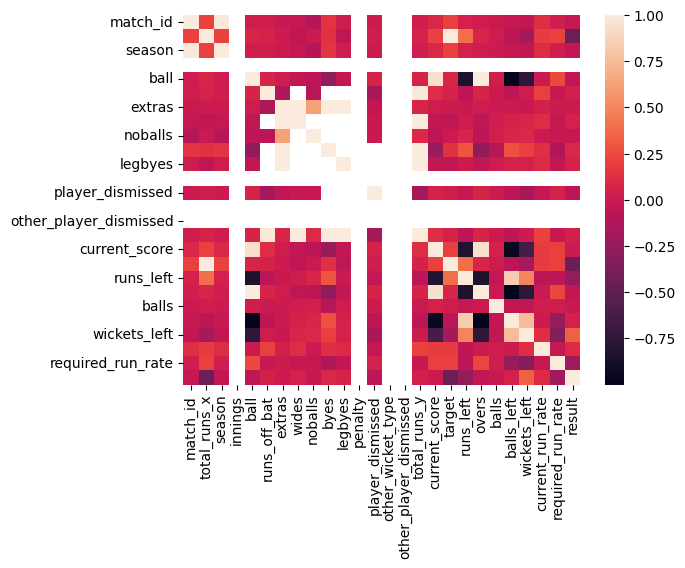

In [ ]:
sns.heatmap(df.corr())

In [ ]:
fi_df1 = df.corr()['result'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','result':'corr_coeff'})
fi_df1.sort_values('corr_coeff', ascending=False)

<ipython-input-152-5803a1bc3b80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fi_df1 = df.corr()['result'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','result':'corr_coeff'})


,feature,corr_coeff
24,result,1.000000
21,wickets_left,0.330983
22,current_run_rate,0.100693
8,byes,0.079174
9,legbyes,0.055403
20,balls_left,0.053448
6,wides,0.050805
4,runs_off_bat,0.042155
14,total_runs_y,0.042025
15,current_score,0.000411


In [ ]:
final_df.sample(5)

,batting_team,bowling_team,venue,target,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
154873,Deccan Chargers,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk, Chennai",161,77,50.0,8,7.37,9.39,0
82345,Kings XI Punjab,Kolkata Knight Riders,Holkar Cricket Stadium,246,196,91.0,10,11.11,12.98,0
138044,Kings XI Punjab,Sunrisers Hyderabad,"Punjab Cricket Association IS Bindra Stadium, ...",151,58,30.0,6,6.20,11.60,0
15933,Rajasthan Royals,Punjab Kings,"Barsapara Cricket Stadium, Guwahati",198,42,15.0,4,9.02,18.26,0
13467,Gujarat Titans,Punjab Kings,"Punjab Cricket Association IS Bindra Stadium, ...",154,65,51.0,8,7.88,7.83,1


In [ ]:
final_df.venue.unique()

array(['Eden Gardens, Kolkata', 'Sharjah Cricket Stadium',
       'Wankhede Stadium, Mumbai', 'Kingsmead',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Sawai Mansingh Stadium, Jaipur',
       'Dubai International Cricket Stadium',
       'Arun Jaitley Stadium, Delhi', 'M.Chinnaswamy Stadium, Bengaluru',
       'Sheikh Zayed Stadium',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dr DY Patil Sports Academy, Mumbai', "St George's Park",
       'The Wanderers Stadium, Johannesburg', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Navi Mumbai',
       'JSCA International Stadium Complex', 'Newlands',
       'Narendra Modi Stadium, Motera, Ahmedabad',
       'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
       'SuperSport Park', 'Zayed Cricket Stadium, Abu Dhabi',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Barsapar

In [ ]:
X_test

,batting_team,bowling_team,venue,target,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
211166,Rajasthan Royals,Royal Challengers Bangalore,"M.Chinnaswamy Stadium, Bengaluru",136,131,115.0,9,10.00,6.86
50453,Sunrisers Hyderabad,Royal Challengers Bangalore,Sheikh Zayed Stadium,132,60,41.0,6,5.50,9.23
20025,Punjab Kings,Delhi Capitals,"Dr DY Patil Sports Academy, Navi Mumbai",160,100,75.0,6,8.22,8.13
44587,Delhi Capitals,Royal Challengers Bangalore,"Narendra Modi Stadium, Motera, Ahmedabad",172,105,58.0,7,6.57,11.17
22420,Sunrisers Hyderabad,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",193,112,51.0,7,7.17,13.49
...,...,...,...,...,...,...,...,...,...
18060,Lucknow Super Giants,Royal Challengers Bangalore,"Eden Gardens, Kolkata",208,142,79.0,8,10.15,10.84
175868,Royal Challengers Bangalore,Rajasthan Royals,"Sawai Mansingh Stadium, Jaipur",131,111,100.0,9,6.25,6.77
39801,Mumbai Indians,Punjab Kings,"Zayed Cricket Stadium, Abu Dhabi",136,97,73.0,8,5.20,8.02
107247,Chennai Super Kings,Royal Challengers Bangalore,JSCA International Stadium Complex,140,102,81.0,9,6.03,7.67


In [ ]:
final_df.iloc[18060]

batting_team                    Kolkata Knight Riders
bowling_team              Royal Challengers Bangalore
venue                M.Chinnaswamy Stadium, Bengaluru
target                                            206
runs_left                                         113
balls_left                                       63.0
wickets_left                                        9
current_run_rate                                 10.0
required_run_rate                               10.97
result                                              1
Name: 74651, dtype: object

In [ ]:
int(10.5)*6 + round((10.5 - int(10.5))*10,1)

65.0

In [ ]:
10.2 - 10

0.1999999999999993